In [144]:
#Import libraries

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [145]:
##pip install beautifulsoup4

In [146]:
#Personal credentials to call Foursquare

CLIENT_ID = 'ASLF5P1K0M20EXA3MTJRWVU5RO1SAGHGENVNY1OQM02MZ0MQ' # your Foursquare ID
CLIENT_SECRET = 'UMRPESBCME1ABKBJDW5PKGCTUIDKPWWZEDWEOXWRVBHZZQ5R' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ASLF5P1K0M20EXA3MTJRWVU5RO1SAGHGENVNY1OQM02MZ0MQ
CLIENT_SECRET:UMRPESBCME1ABKBJDW5PKGCTUIDKPWWZEDWEOXWRVBHZZQ5R


In [147]:
#parameters to call Foursquare

latitude=48.866667
longitude=2.333333
radius=4500
LIMIT = 500
categoryId = '4bf58dd8d48988d129941735' #city halls
categoryId2= '52e81612bcbc57f1066b7a22,4bf58dd8d48988d1e5941735,4bf58dd8d48988d15a941735,52e81612bcbc57f1066b7a23,52e81612bcbc57f1066b7a21,4bf58dd8d48988d163941735' #green areas like gardens, parks

In [148]:
#calling Foursquare to get the location of the hall of each borough in Paris

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&categoryId={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, categoryId, LIMIT)

results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

/Users/username/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


In [149]:
# keep only columns that include venue name, and location
filtered_columns = ['name', 'location.lat', 'location.lng']
dataframe_filtered2 = dataframe.loc[:, filtered_columns]

In [150]:
#Keep only the relevant City Halls

dataframe_filtered3=dataframe_filtered2[dataframe_filtered2.name.str.contains("Mairie du")]
data_mairie=dataframe_filtered3[~dataframe_filtered3.name.str.contains("Paris")]

In [151]:
#Cleaning and renaming datas

data_mairie.reset_index(drop=True, inplace=True)
data_mairie.columns = ['name','lat','long']
data_mairie

,name,lat,long
0,Mairie du 2e arrondissement,48.866807,2.340378
1,Mairie du 11e arrondissement,48.858420,2.379658
2,Mairie du 9e arrondissement,48.872482,2.341075
3,Mairie du 12e arrondissement,48.841153,2.387725
4,Mairie du 14e arrondissement,48.833071,2.326913
5,Mairie du 5e arrondissement,48.846398,2.344738
6,Mairie du 7e arrondissement,48.856995,2.320108
7,Mairie du 20e arrondissement,48.865002,2.398733
8,Mairie du 15e arrondissement,48.841282,2.299853
9,Mairie du 6e arrondissement,48.850601,2.332904


In [152]:
# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, long, label in zip(data_mairie['lat'], data_mairie['long'], data_mairie['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

In [153]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&categoryId={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, categoryId2, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

/Users/username/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


In [154]:
# keep only columns that include venue name, and location
filtered_columns = ['name', 'location.lat', 'location.lng']
datagreen = dataframe.loc[:, filtered_columns]
datagreen.head()

,name,location.lat,location.lng
0,Jardin du Palais Royal,48.864941,2.337728
1,Petite Ceinture du 15e,48.834463,2.287173
2,Jardin des Tuileries,48.863642,2.326484
3,Parc du Champ de Mars (Jardin du Champ-de-Mars),48.855567,2.298760
4,Promenade plantée – La Coulée Verte,48.847632,2.375107


In [155]:
# add markers of parcs to map
for lt, lg, lbl in zip(datagreen['location.lat'], datagreen['location.lng'], datagreen['name']):
    lbl = folium.Popup(lbl, parse_html=True)
    folium.CircleMarker(
        [lt, lg],
        radius=3,
        popup=lbl,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
map_paris

In [156]:
#clustering

k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
filtered_columns2 = ['location.lat', 'location.lng']
dataclust = datagreen.loc[:, filtered_columns2]
dataclust.head()

,location.lat,location.lng
0,48.864941,2.337728
1,48.834463,2.287173
2,48.863642,2.326484
3,48.855567,2.298760
4,48.847632,2.375107


In [157]:
#Fitting

X=dataclust.to_numpy()
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [158]:
k_means_labels = k_means.labels_

In [159]:
k_means_cluster_centers = k_means.cluster_centers_

In [160]:
dfcenter=pd.DataFrame(k_means_cluster_centers)

In [161]:
#converting cluster labels into color for the map
kml=[]
          
for i in range(len(k_means_labels)):
    if k_means_labels[i]==0:
        kml.append('blue')
    elif k_means_labels[i]==1:
        kml.append('green')
    elif k_means_labels[i]==2:
        kml.append('red')
    else:
        kml.append('purple')

In [162]:
#create a map of the clusters

map_cluster = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of parcs to map
for lt, lg, lbl,kl in zip(datagreen['location.lat'], datagreen['location.lng'], datagreen['name'], kml):
    lbl = folium.Popup(lbl, parse_html=True)
    folium.CircleMarker(
        [lt, lg],
        radius=3,
        popup=lbl,
        color=kl,
        parse_html=False).add_to(map_cluster)


# add markers of cluster centers to map
for latit,longi in zip(dfcenter[0], dfcenter[1]):
    folium.CircleMarker(
        [latit,longi],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_cluster)
  
map_cluster

In [163]:
#DISTANCE CODES FROM FOURSQUARE THAT WILL BE USED

#Green facilities
#distance to a garden 4bf58dd8d48988d15a941735
#distance to bike trails 56aa371be4b08b9a8d57355e
#distance to a pedestrian area 52e81612bcbc57f1066b7a25

#Water facilities
#distance to a fountain 56aa371be4b08b9a8d573547
#distance to a bathing area 52e81612bcbc57f1066b7a28

In [164]:
#Make a list of the codes used
venue=['4bf58dd8d48988d15a941735','56aa371be4b08b9a8d57355e','52e81612bcbc57f1066b7a25','56aa371be4b08b9a8d573547','52e81612bcbc57f1066b7a28']

In [165]:
#Making a function that return the location of the closest venue defined by the id

def Closest_venue (lat, long, id_venue):
     
    CLIENT_ID = 'ASLF5P1K0M20EXA3MTJRWVU5RO1SAGHGENVNY1OQM02MZ0MQ' # your Foursquare ID
    CLIENT_SECRET = 'UMRPESBCME1ABKBJDW5PKGCTUIDKPWWZEDWEOXWRVBHZZQ5R' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    radius=4500
    LIMIT = 500
    longitude = long;
    latitude = lat;
    categoryId = id_venue;
        
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&categoryId={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, categoryId, LIMIT)

    results = requests.get(url).json()

    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a dataframe
    df = json_normalize(venues)
    return df.loc[df['location.distance'].idxmin()]['location.distance']
    

In [166]:
#Making a function to apply closest venue to a dataframe of places an a list of different venues

def Distance_matrix(pd_lieux, list_venues):

    res = pd.DataFrame(columns = list_venues, index=pd_lieux.name)
    
    for row in range(len(pd_lieux)):
        for i in range(len(list_venues)): 
            res.loc[res.index[row],venue[i]] = Closest_venue(pd_lieux['lat'][row], pd_lieux['long'][row], list_venues[i])
            
    return res

In [167]:
df_test =Distance_matrix(data_mairie,venue)

/Users/username/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [168]:
df_test.head()

,4bf58dd8d48988d15a941735,56aa371be4b08b9a8d57355e,52e81612bcbc57f1066b7a25,56aa371be4b08b9a8d573547,52e81612bcbc57f1066b7a28
name,,,,,
Mairie du 2e arrondissement,284,1081,384,241,2934
Mairie du 11e arrondissement,500,4072,790,831,1552
Mairie du 9e arrondissement,836,942,77,504,2416
Mairie du 12e arrondissement,129,4271,885,67,2512
Mairie du 14e arrondissement,931,4369,584,1070,1653


In [61]:
#Based on the result of the Distance_matrix function we create an absolute indicator on the easyness to access the different venues

df2=df_test.sum(axis = 1)
df_test.groupby(axis = 0,level=0).sum()
df_test/(len(df_test.columns))
df_test2 =df_test.loc[:, [df_test.columns[1]]]
df_test2.columns = ['absolute indicator']
df_test2

,absolute indicator
name,
Mairie du 2e arrondissement,1081
Mairie du 12e arrondissement,4271
Mairie du 5e arrondissement,3128
Mairie du 15e arrondissement,4030
Mairie du 19e arrondissement,4099
Mairie du 10e arrondissement,2179
Mairie du 14e arrondissement,4369
Mairie du 18e arrondissement,2027
Mairie du 13e arrondissement,4874


In [62]:
#ploting the absolute indicator
import matplotlib.pyplot as plt

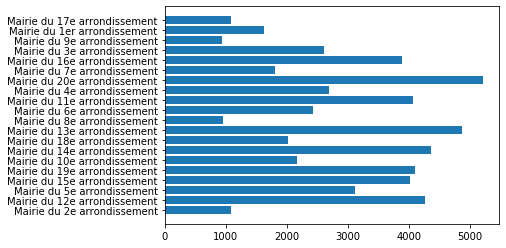

In [66]:
# Make dataset
height = df_test2['absolute indicator']
bars = df_test2.index
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

In [148]:
#relative indicator : ranking the borough based on the two aspect : Green venues and water facilities
df_indr=df_test
df_indr['4bf58dd8d48988d15a941735']=(df_indr['4bf58dd8d48988d15a941735']+df_indr['56aa371be4b08b9a8d57355e']+df_indr['52e81612bcbc57f1066b7a25'])/3
df_indr['56aa371be4b08b9a8d573547']=(df_indr['56aa371be4b08b9a8d573547']+df_indr['52e81612bcbc57f1066b7a28'])/2
df_indr=df_indr.drop(columns=['56aa371be4b08b9a8d57355e', '52e81612bcbc57f1066b7a28','52e81612bcbc57f1066b7a25'])
df_indr.columns = ['ind green','ind water']

df_indr=df_indr.sort_values(by = 'ind green')
resr=df_indr

for row in range(len(df_indr)):
    resr.loc[resr.index[row],'ind green'] = row+1
    
df_indr=df_indr.sort_values(by = 'ind water')
resr=resr.sort_values(by = 'ind water')
    
for row in range(len(df_indr)):
    resr.loc[resr.index[row],'ind water'] = row+1
    
resr

,ind green,ind water
name,,
Mairie du 20e arrondissement,18,1
Mairie du 19e arrondissement,19,2
Mairie du 17e arrondissement,3,3
Mairie du 8e arrondissement,4,4
Mairie du 16e arrondissement,13,5
Mairie du 11e arrondissement,15,6
Mairie du 14e arrondissement,16,7
Mairie du 18e arrondissement,7,8
Mairie du 15e arrondissement,14,9


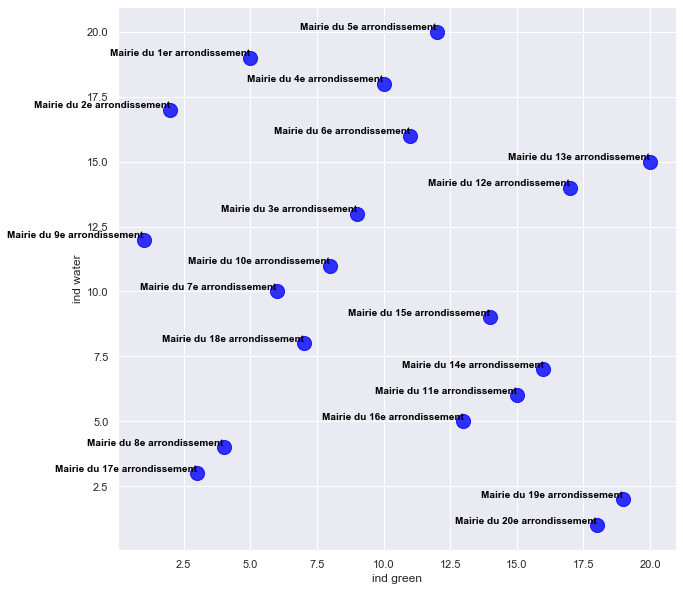

In [157]:
#graph
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
p1=sns.regplot(x=resr["ind green"], y=resr["ind water"], fit_reg=False,scatter_kws={"color":"blue","s":200})

# add annotations one by one with a loop
for line in range(0,resr.shape[0]):
     p1.text(resr["ind green"][line], resr["ind water"][line], resr.index[line], ha='right',va='bottom', size='10', color='black', weight='semibold')
        

In [76]:
#we can also plot the average distance for each family of venues

df_test
df_indf=df_test
df_indf['4bf58dd8d48988d15a941735']=(df_indf['4bf58dd8d48988d15a941735']+df_indf['56aa371be4b08b9a8d57355e']+df_indf['52e81612bcbc57f1066b7a25'])/3
df_indf['56aa371be4b08b9a8d573547']=(df_indf['56aa371be4b08b9a8d573547']+df_indf['52e81612bcbc57f1066b7a28'])/2
df_indf=df_indf.drop(columns=['56aa371be4b08b9a8d57355e', '52e81612bcbc57f1066b7a28','52e81612bcbc57f1066b7a25'])
df_indf.columns = ['ind green','ind water']

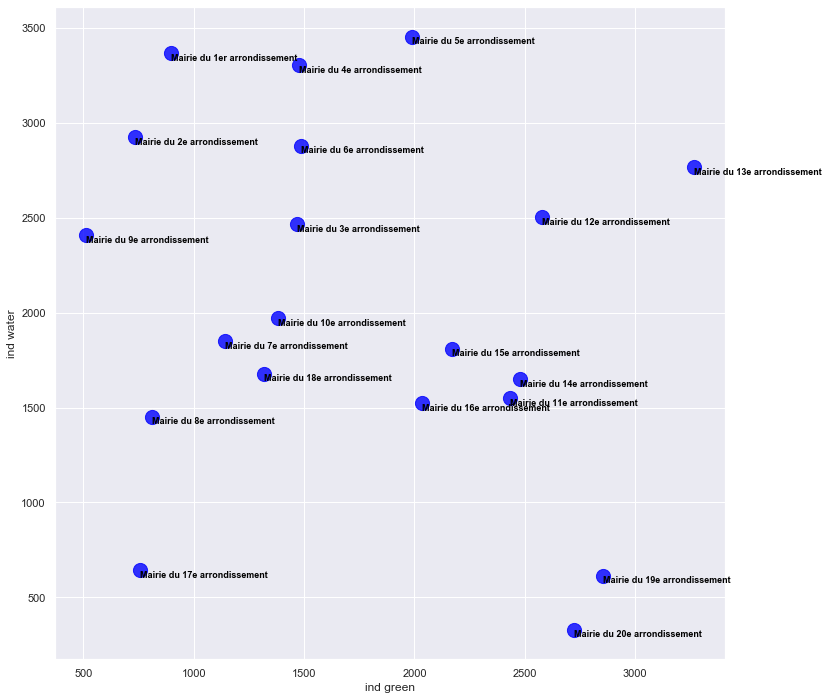

In [154]:
#graph
sns.set(rc={'figure.figsize':(12,12)})
p1=sns.regplot(x=df_indf["ind green"], y=df_indf["ind water"], fit_reg=False,scatter_kws={"color":"blue","s":200})

# add annotations one by one with a loop
for line in range(0,df_indf.shape[0]):
     p1.text(df_indf["ind green"][line], df_indf["ind water"][line]-50, df_indf.index[line], ha='left',va='bottom', size='9', color='black', weight='semibold')
        
        

[[ 986.65038358 1667.34960938]
 [2493.2316974  1967.29882812]
 [1341.09198293 3065.64908854]
 [2788.87692425  471.74414062]]


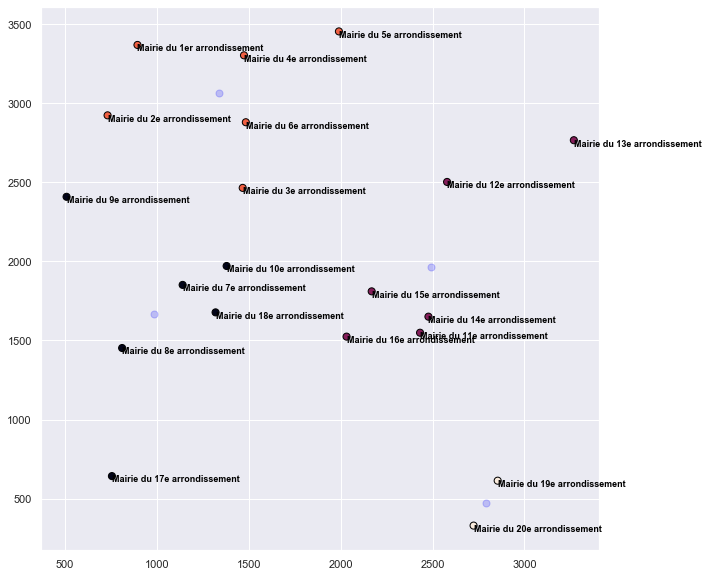

In [179]:
#Now we try to cluster the different borough 

#clustering

kmeans = KMeans(n_clusters=4).fit(df_indf)
centroids = kmeans.cluster_centers_

plt.scatter(df_indf['ind green'], df_indf['ind water'], c= kmeans.labels_.astype(float), s=80,edgecolors = 'black')
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=50, alpha=0.2)

# add annotations one by one with a loop
for line in range(0,df_indf.shape[0]):
     plt.text(df_indf["ind green"][line], df_indf["ind water"][line]-50, df_indf.index[line], ha='left',va='bottom', size='9', color='black', weight='semibold')
    

plt.show()

In [ ]:
# With the four clusters, we can define four types of borough :

# 1) Easy access to green facilities and water facilities (17,8,18,7,10,9)
# 2) Easy access to green facilities and difficulty to access water facilities (1,2,3,4,5,6)
# 3) Difficulty to access to green facilities and easy access to water facilities (19,20)
# 4) Difficulty to access to green facilities and difficulty to access water facilities (11,12,13,14,15,16)